## Step 1: Load

We need to set-up several things and with a specific structure so that it's readable for the excursion estimator and
learner object.
We have pre-loaded a python script for data on:
-  **True/Black-box function** (this is not a tutorial using funcX, just a simple toy function is all we need)
-  **Grid**: domain where you will search for next evaluation points?
<br /><br />We have pre-loaded a yaml script for algorithm options on:
-  **Gaussian Process**: which kernel and likelihood do you want to use?
-  **Algorithm Options**: which acquisition function? Do you want batch selection? How many points per batch? Which batch method selection?

There are many choices and a user might not know a priori what to use. That is why I am preparing a set of complete
examples that you just have to load to get started. These pre-build examples are in `excursion/???/*.py` these
`.py` scripts contain initialization for: true/black-box function and grid (the "numerical options"). The files in
`excursion/??/??/*.yml` are yaml files that contain pre-established Gaussian Processes and Algorithm Options
(the "algorithm options"). This way of ordering the init step makes it easy to fix a numerical problem while trying
different algorithm configurations and vice versa.
<br /><br /> The purpose of using the abstract interfaces for a learner object helps reduce the amount of interaction
users have with the torch library to a minimum. The complete examples provide the ability for the user to explore the entire
excursion library without having to write their own code.


In [1]:
import matplotlib.pyplot as plt
import torch
import yaml
import json
%load_ext autoreload
%autoreload 2
import numpy as np
np.warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import excursion_new.test_suite.test_functions.fast_2D as testcase_2D
import excursion_new.test_suite.test_functions.fast_1D as testcase_1D

file = open('../excursion_new/test_suite/algorithm_specs_test.yaml', "r")
algorithm_opts = yaml.safe_load(file)
print('algorithm_opts =')
print(json.dumps(algorithm_opts, indent=4))

algorithm_opts =
{
    "example": "Simple Learner Usage",
    "ninit": 3,
    "init_type": "random",
    "jump_start": true,
    "device": "cuda",
    "likelihood": {
        "likelihood_type": "GaussianLikelihood",
        "epsilon": 0.0
    },
    "model": {
        "type": "ExactGP",
        "fit_optimizer": "Adam"
    },
    "acq": {
        "acq_type": "MES"
    }
}


## Step 2: Initialize the learner objects.
There are many ways we could have started our Bayesian optimization problem. Using the provided example templates you
can avoid all of that using the Learner class. If you wanted your own special initialization you can use _Learner and
make your own.

In [3]:
from excursion_new.plotting import plot, plot_confusion_matrix
from excursion_new.learner import Learner
learner_one = Learner(testcase_1D, algorithm_opts)
learner_two = Learner(testcase_2D, algorithm_opts)


# This creates the estimator object which will do the steps of Bayesian optimization.
# Can fix later so that just calling learner.suggest() if initialize wasn't called yet then it will call.
# It can be very expensive to initialize an estimator if it is a snapshot, since it will need training, so this function was spun off.
learner_one.initialize()
learner_two.initialize()

Accuracy % 0.72
Accuracy % 0.6466389054134444


## Step 3: Run the optimization loop.
There are two ways to do this. If the problem details have properly provided a function handle then one can run the loop
with the extra functions provided by learner. If not they must use the ask-and-tell style loop.

tensor([[5.0000]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.71


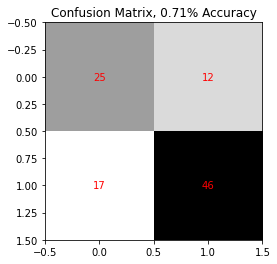

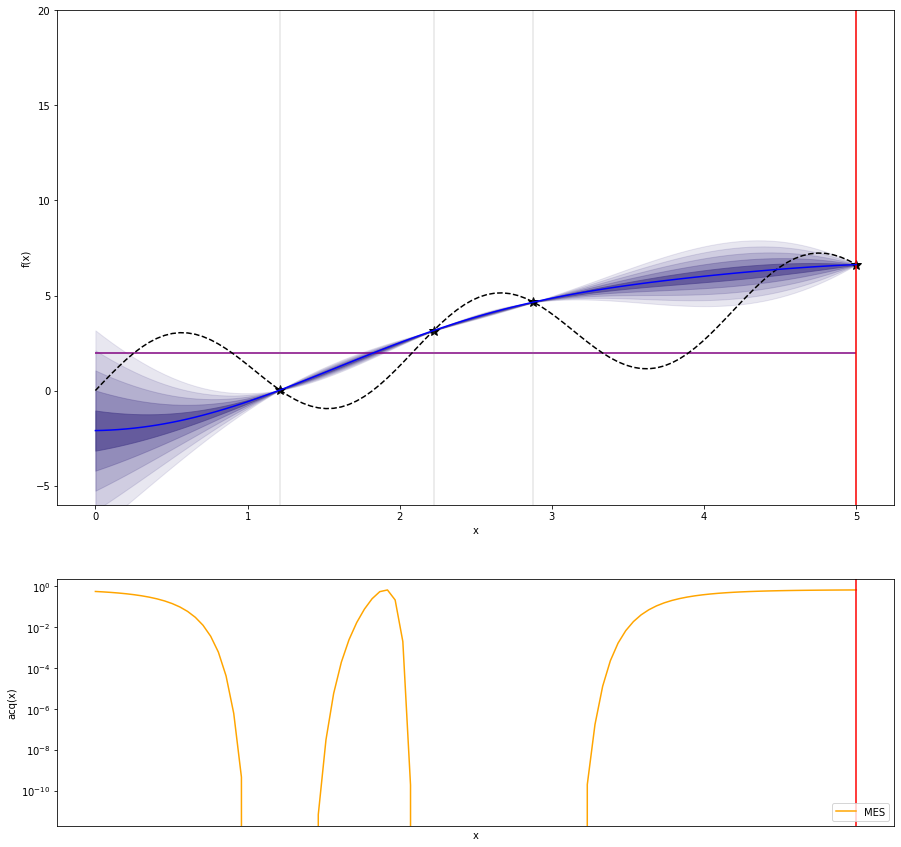

tensor([[1.8182]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.82


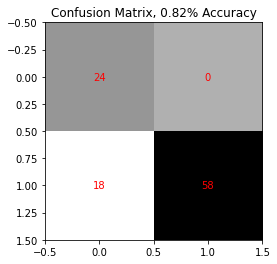

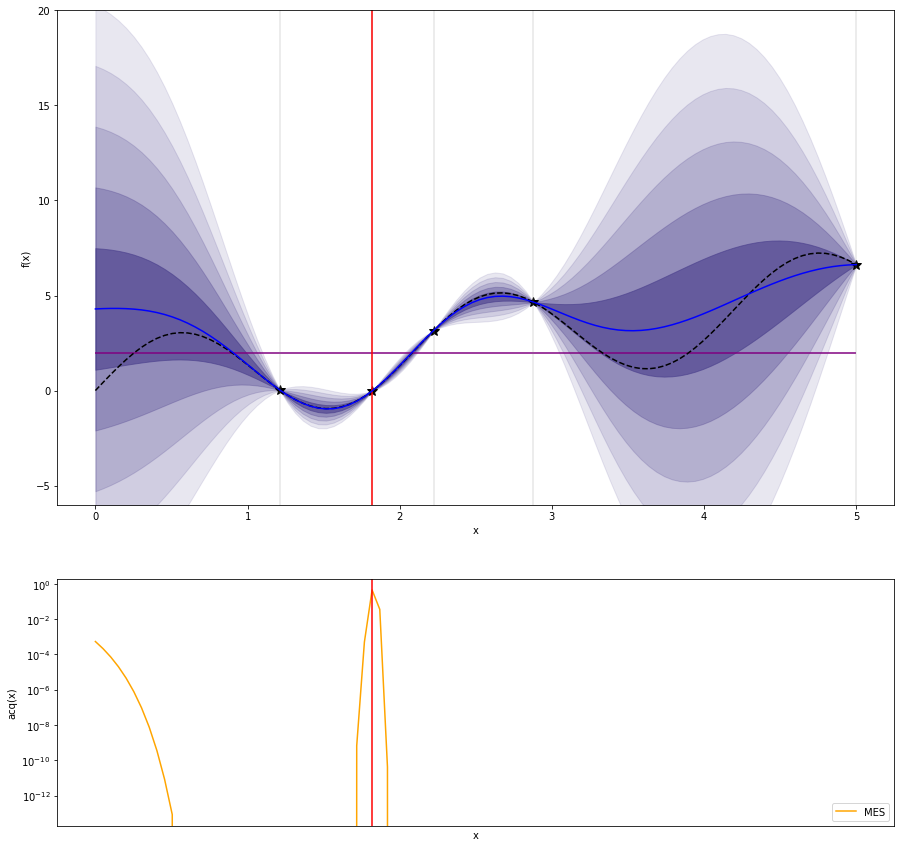

tensor([[0.9091]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.82


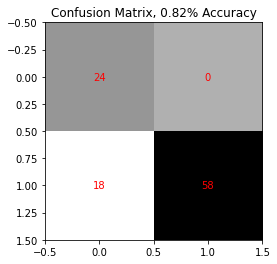

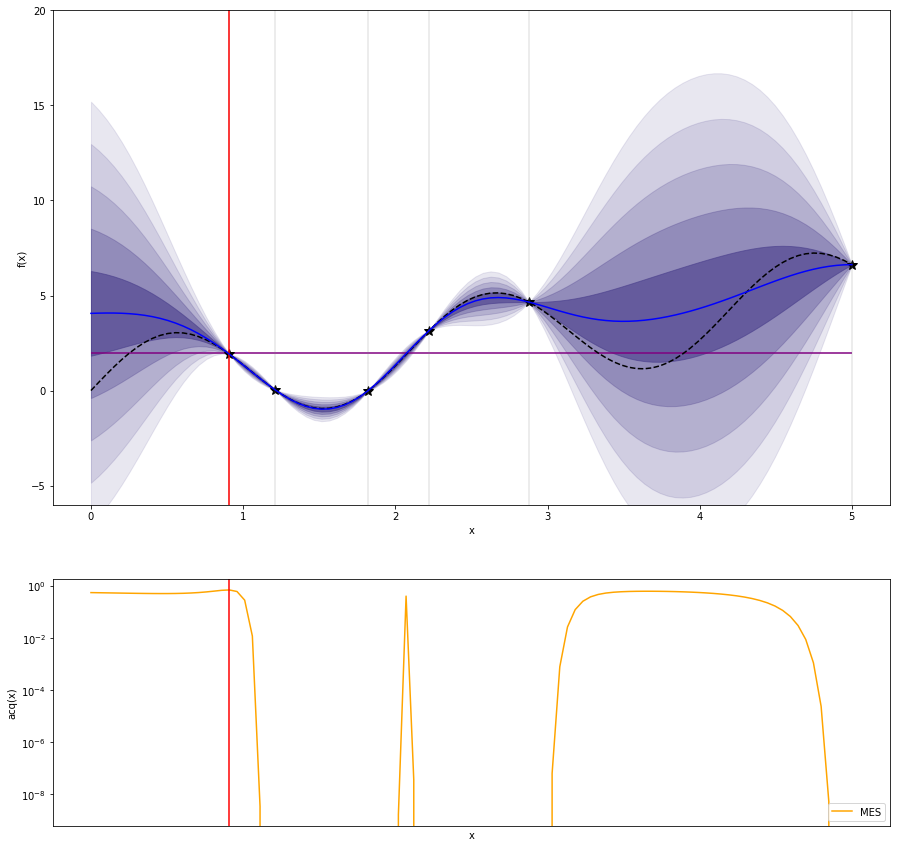

tensor([[3.6869]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.89


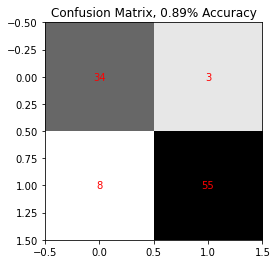

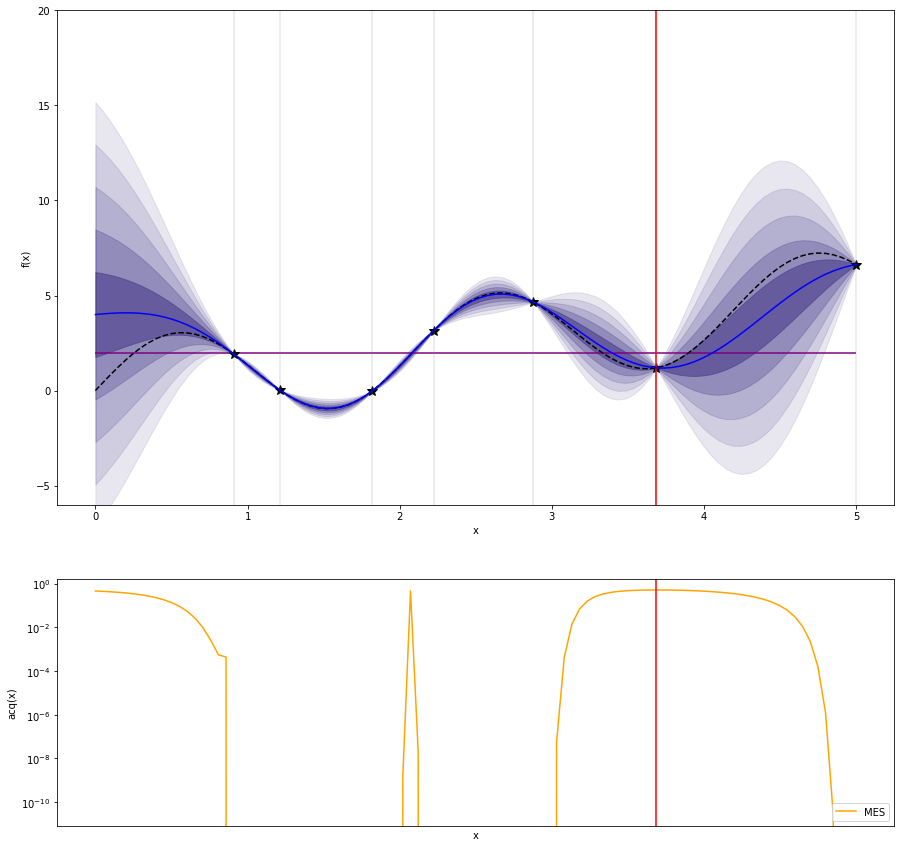

tensor([[3.3838]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.93


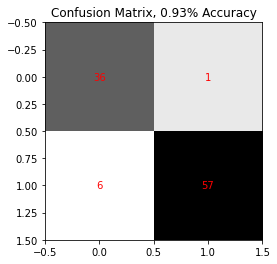

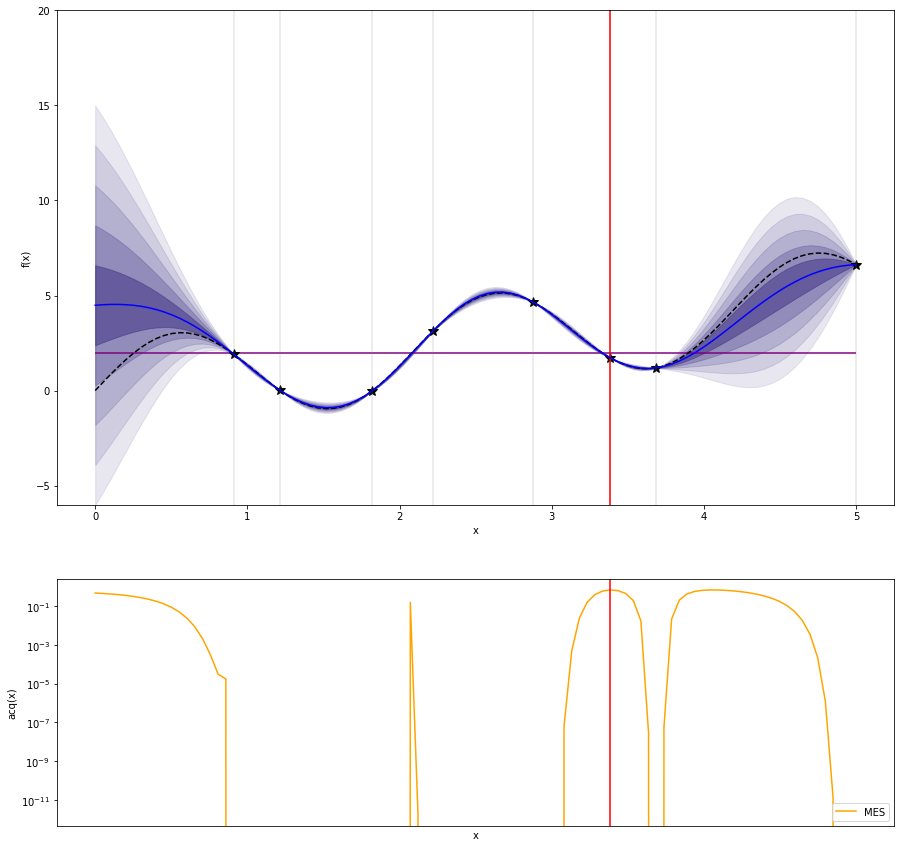

tensor([[3.9394]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.94


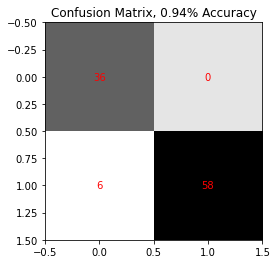

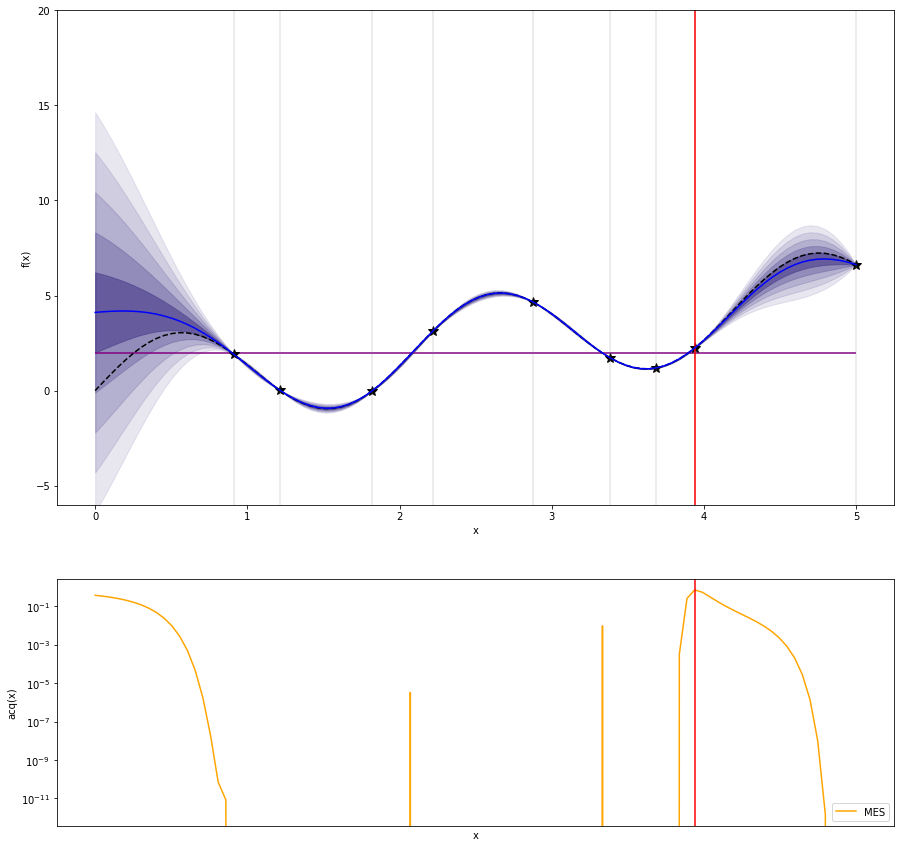

tensor([[0.]], device='cuda:0', dtype=torch.float64)
Accuracy % 0.99


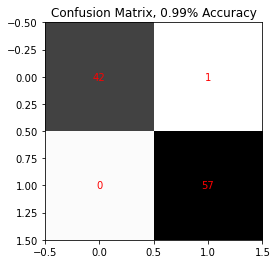

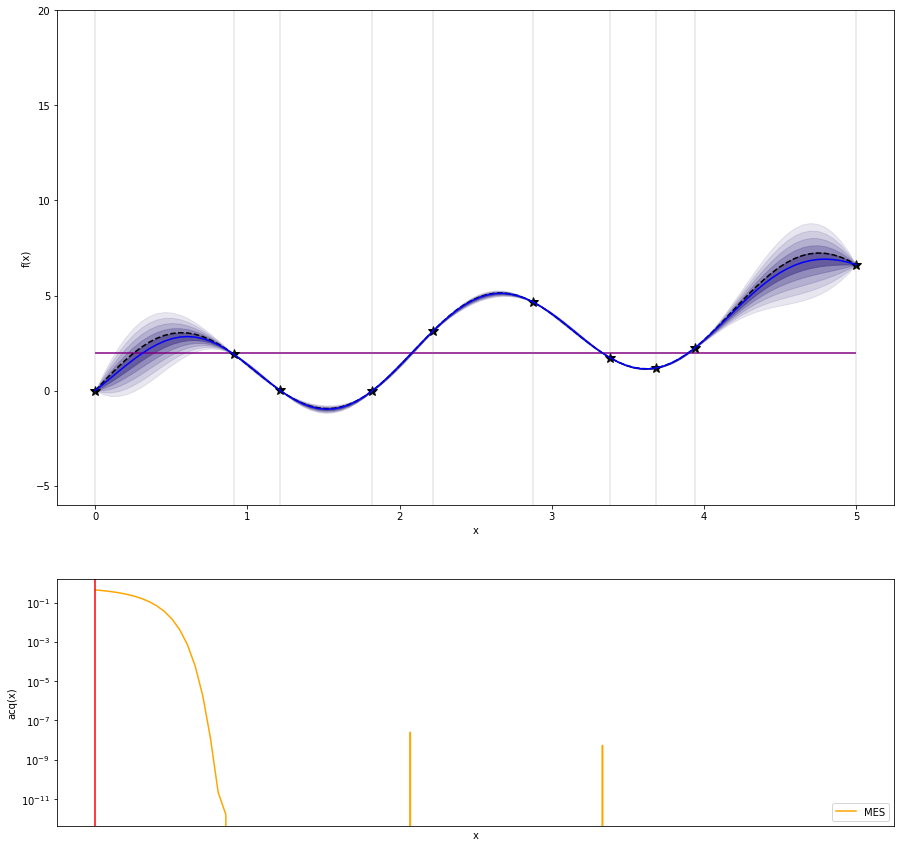

tensor([[0.3030]], device='cuda:0', dtype=torch.float64)
Accuracy % 1.0


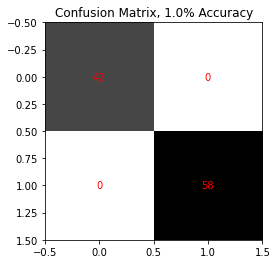

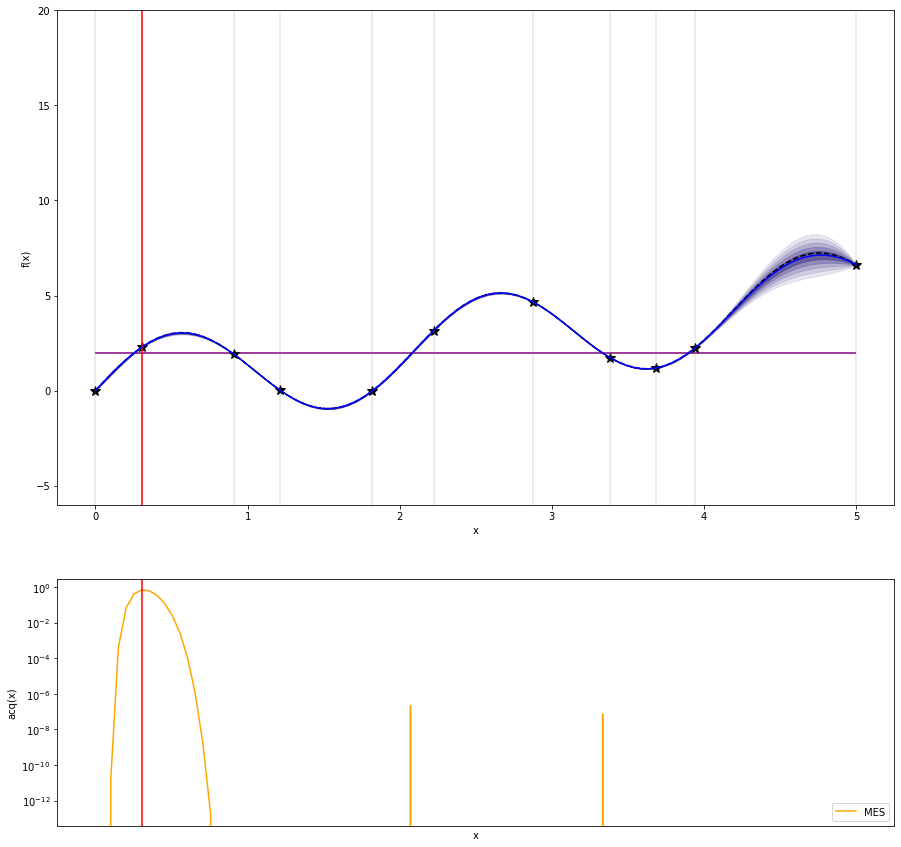

tensor([[0.2525]], device='cuda:0', dtype=torch.float64)
Accuracy % 1.0


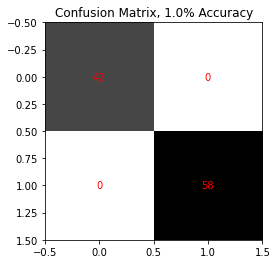

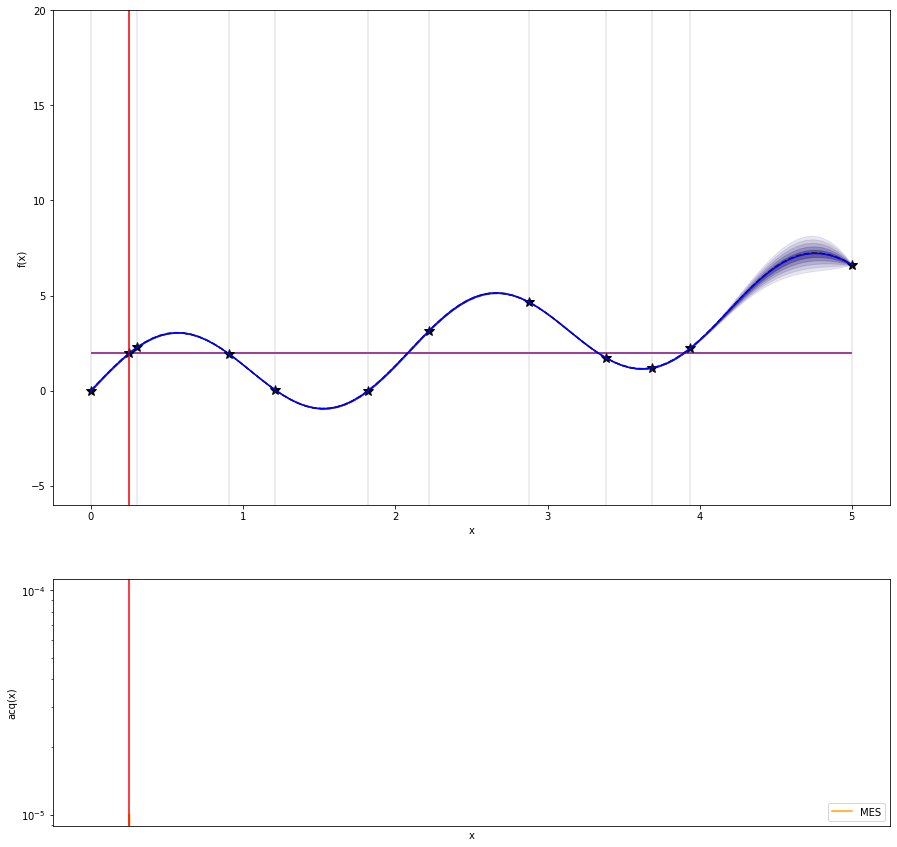

tensor([[0.0505]], device='cuda:0', dtype=torch.float64)
Accuracy % 1.0


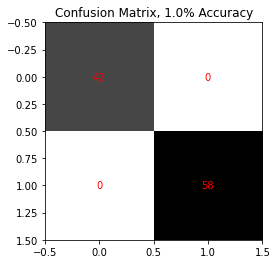

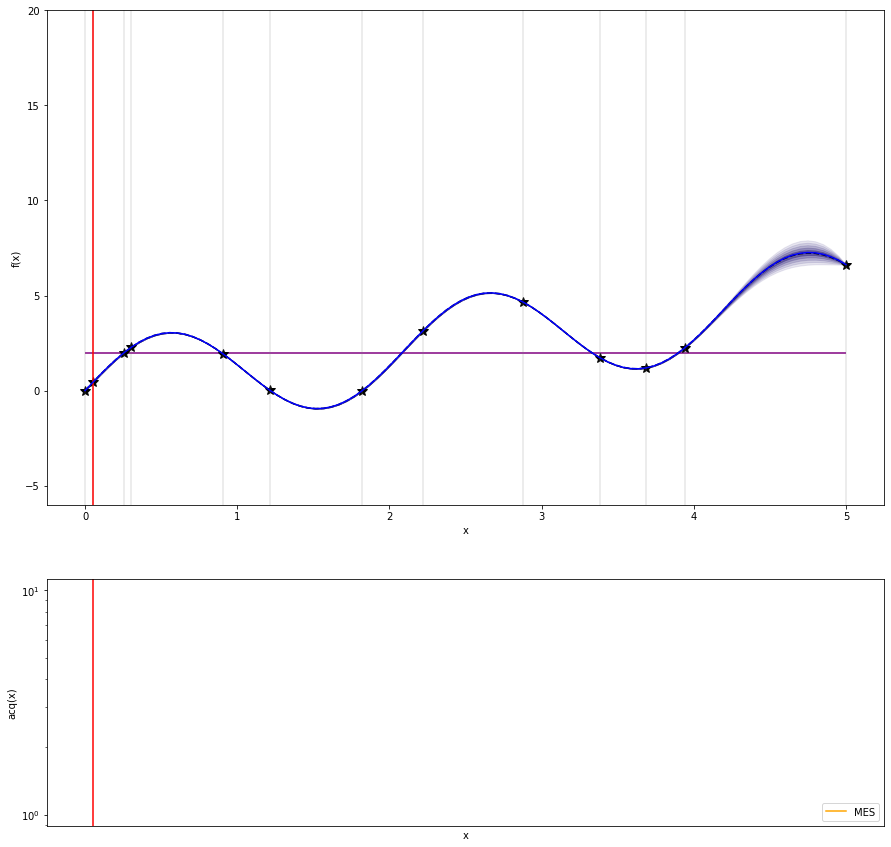

tensor([[0.1010]], device='cuda:0', dtype=torch.float64)
Accuracy % 1.0


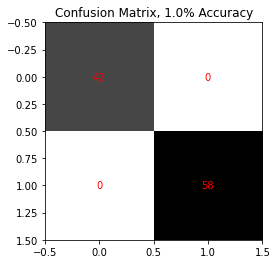

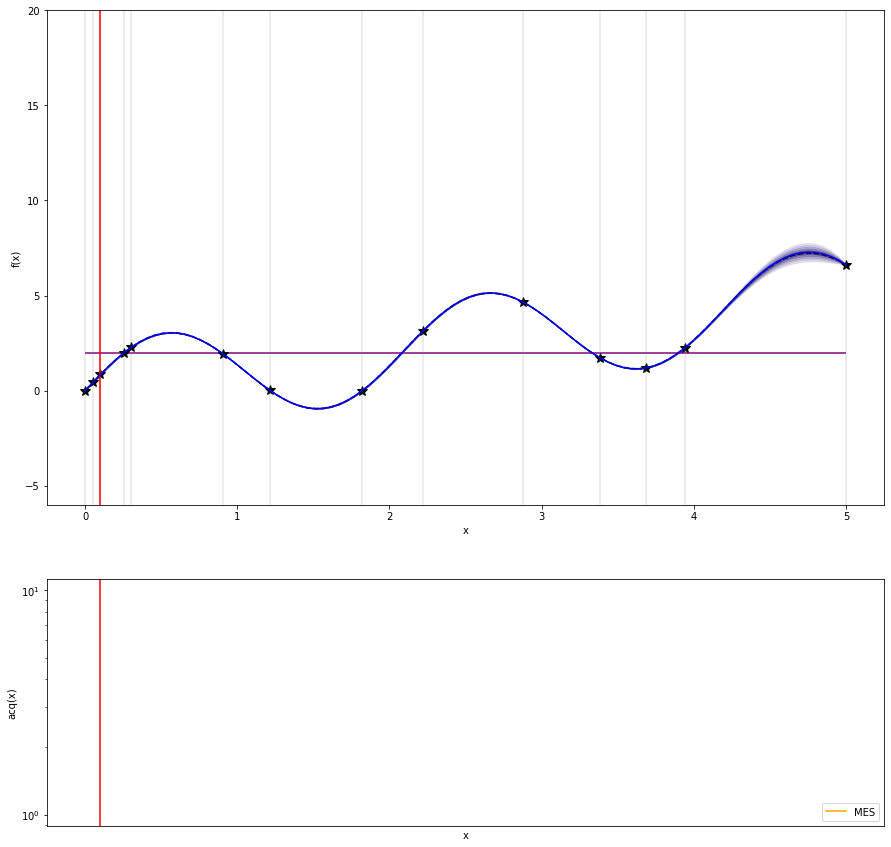

tensor([[0.1515]], device='cuda:0', dtype=torch.float64)
Accuracy % 1.0


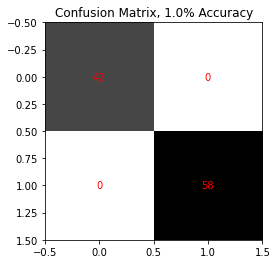

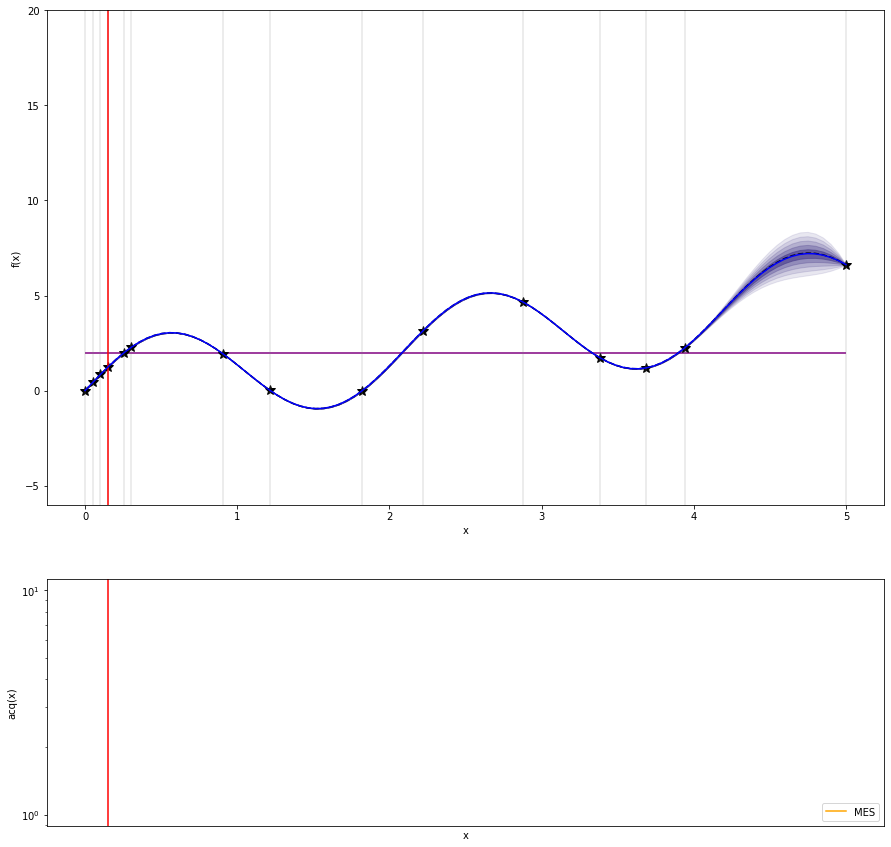

tensor([[0.2020]], device='cuda:0', dtype=torch.float64)
Accuracy % 1.0


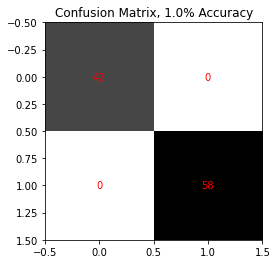

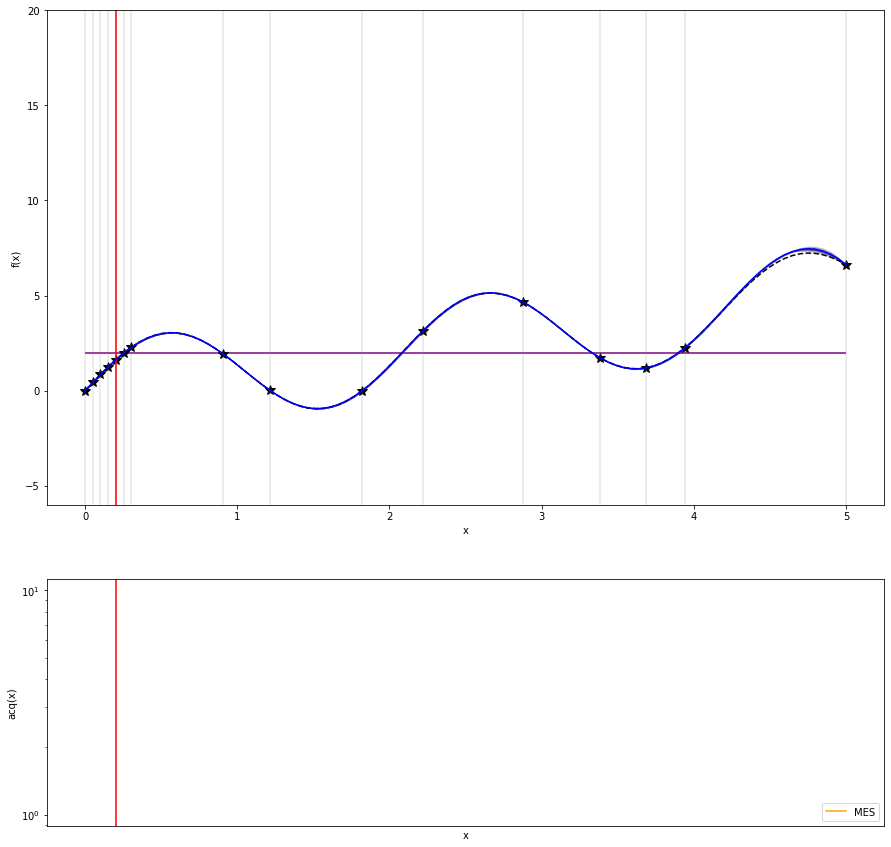

tensor([[0.3535]], device='cuda:0', dtype=torch.float64)
Accuracy % 1.0


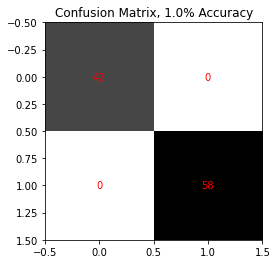

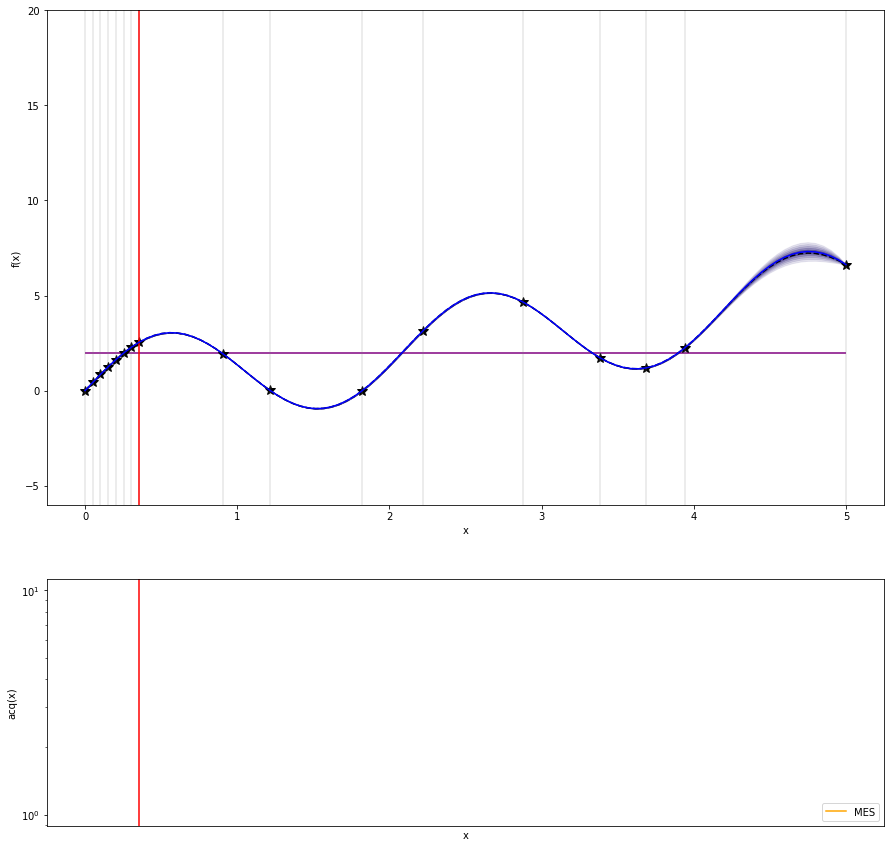

tensor([[0.4040]], device='cuda:0', dtype=torch.float64)
Accuracy % 1.0


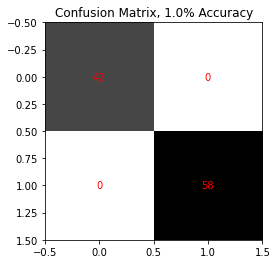

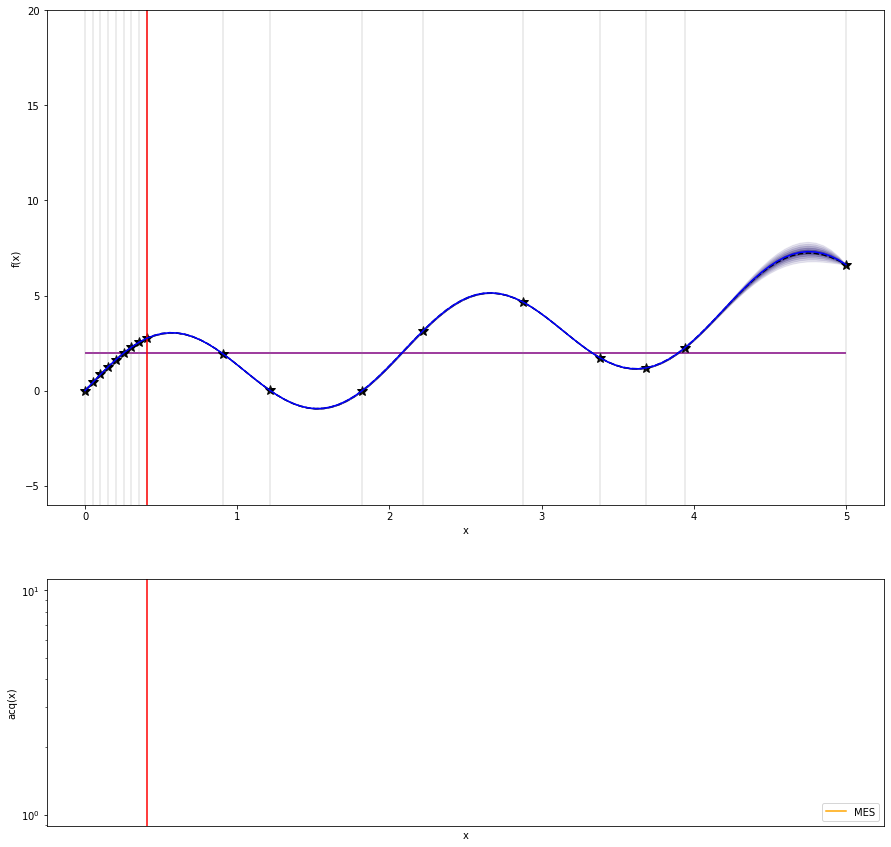

Accuracy % 0.7239738251041047


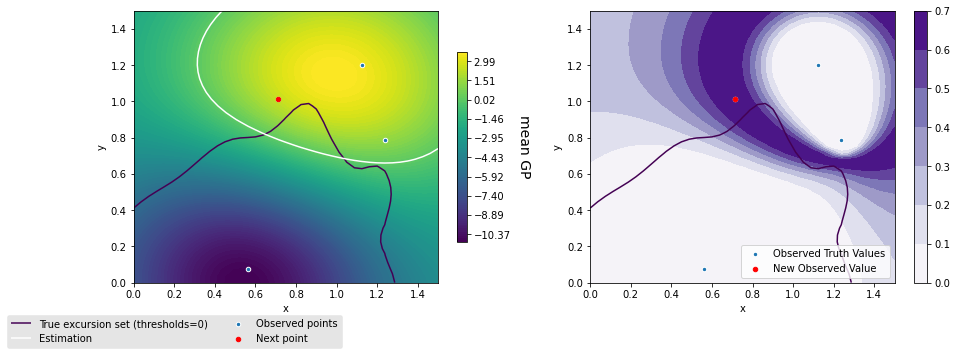

Accuracy % 0.9155264723378941


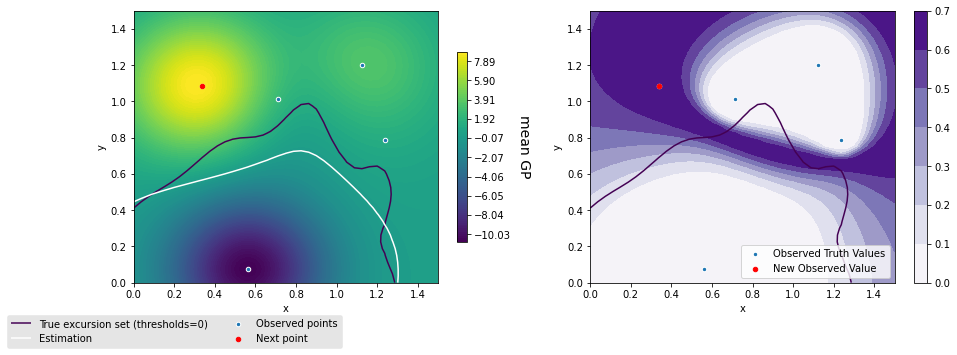

Accuracy % 0.9428911362284355


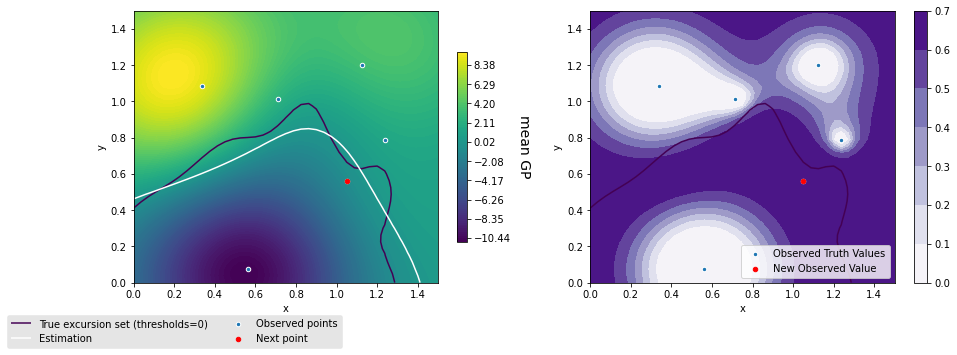

Accuracy % 0.9399167162403331


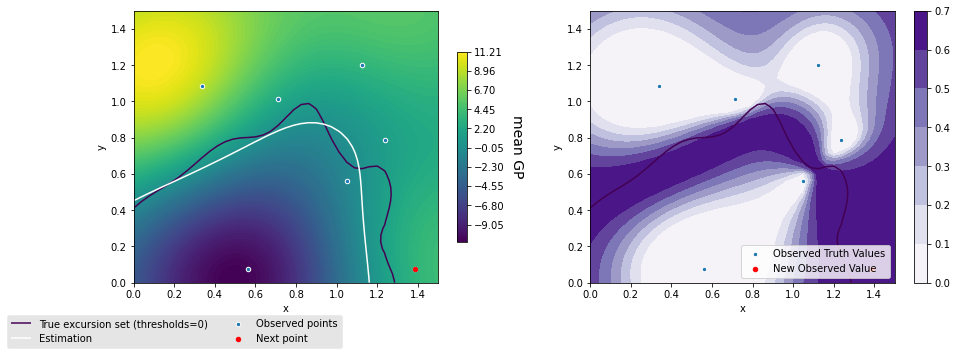

Accuracy % 0.9274241522903034


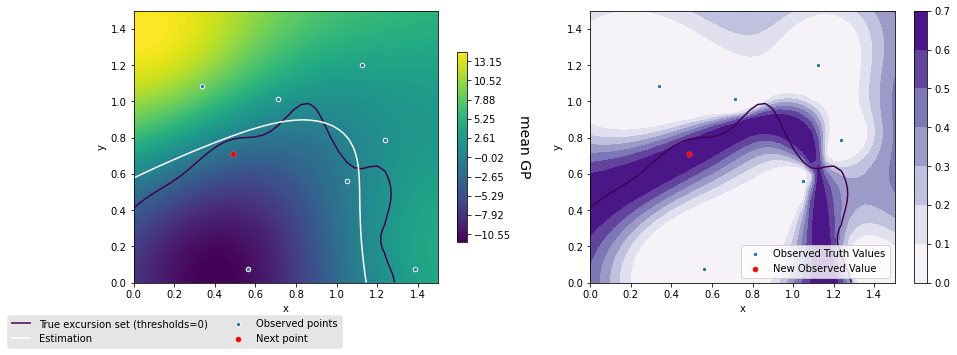

Accuracy % 0.9280190362879238


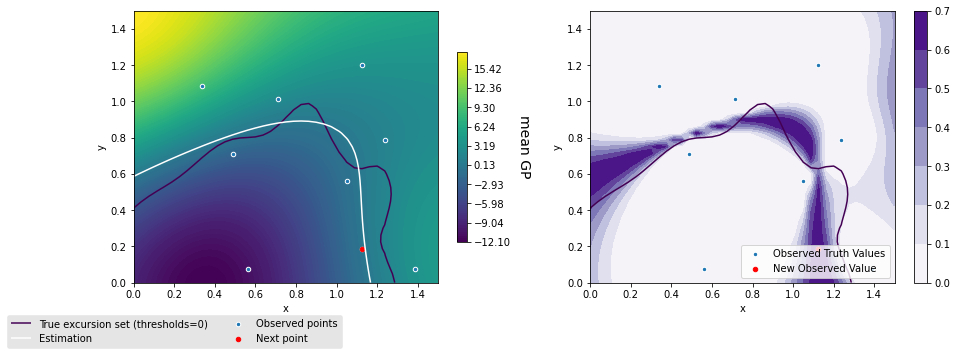

Accuracy % 0.9327781082688875


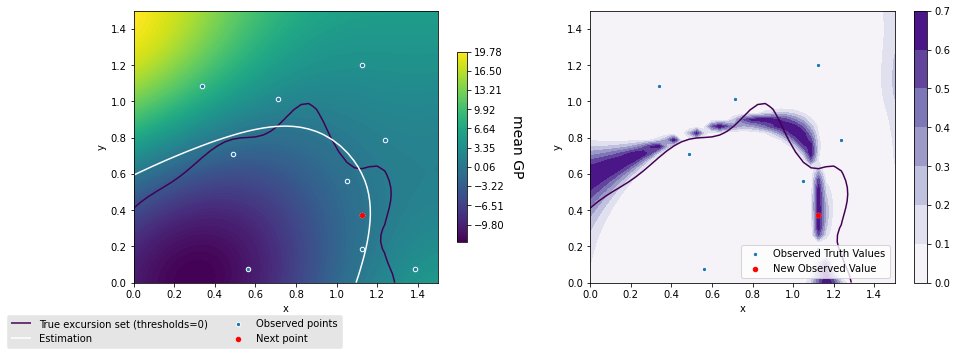

Accuracy % 0.934562760261749


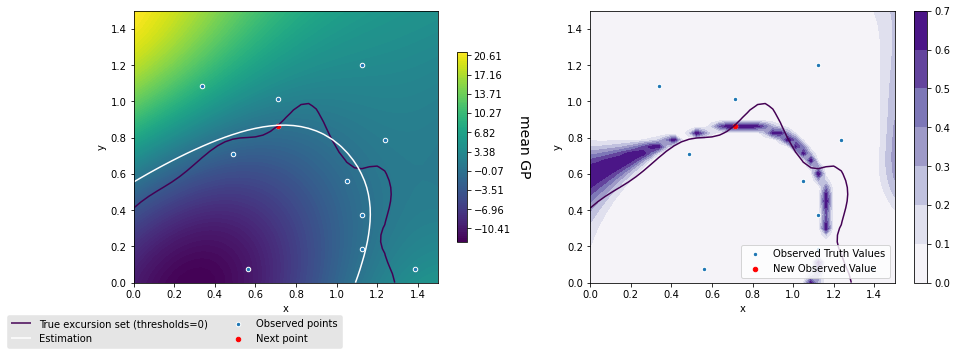

Accuracy % 0.917906008328376


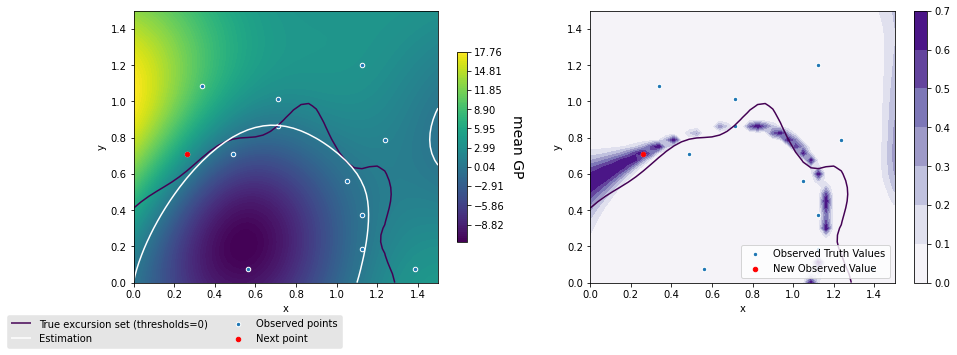

Accuracy % 0.9244497323022011


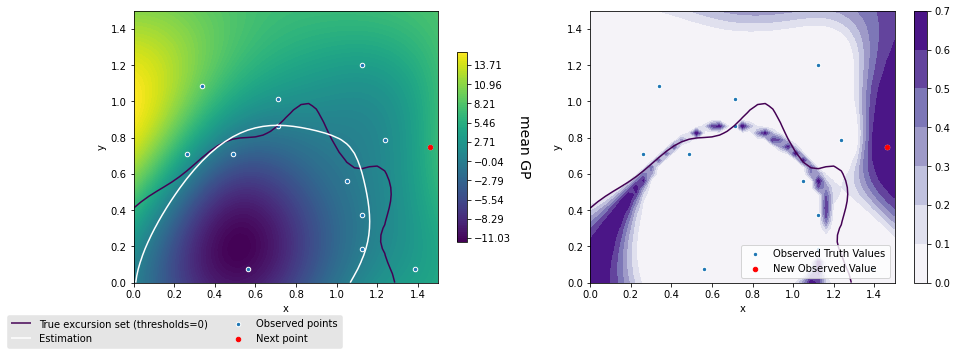

Accuracy % 0.934562760261749


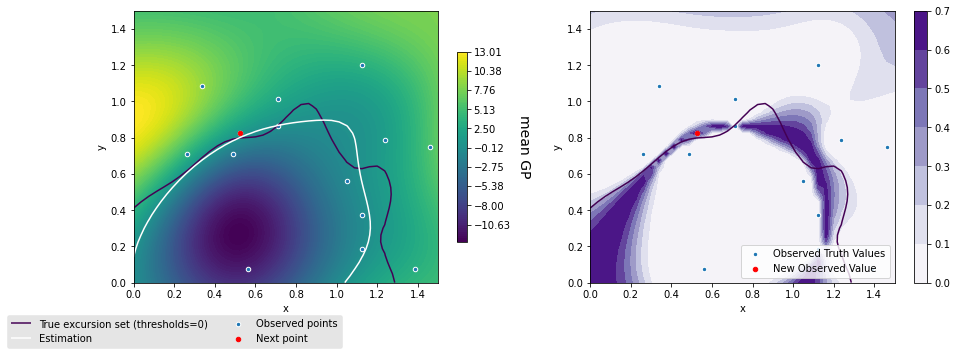

Accuracy % 0.9482450922070196


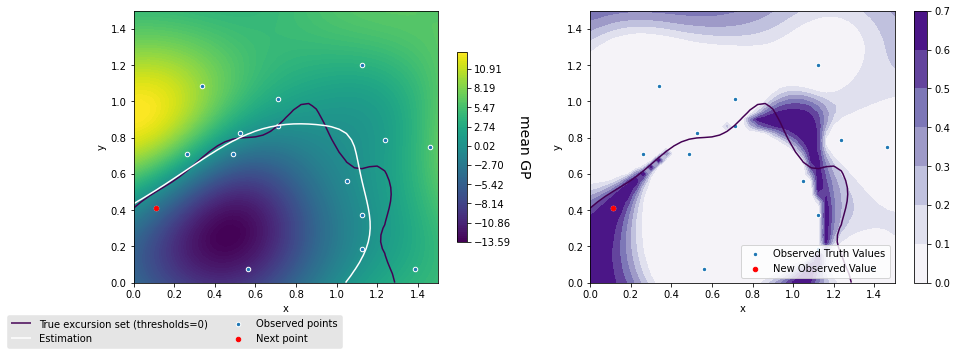

Accuracy % 0.9559785841760856


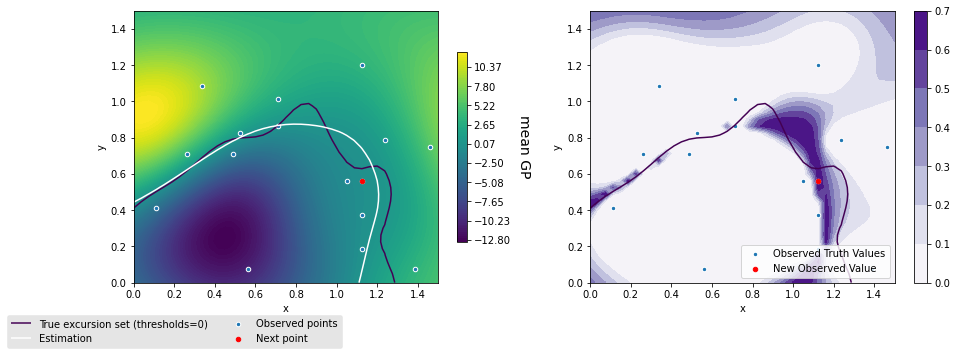

Accuracy % 0.9363474122546104


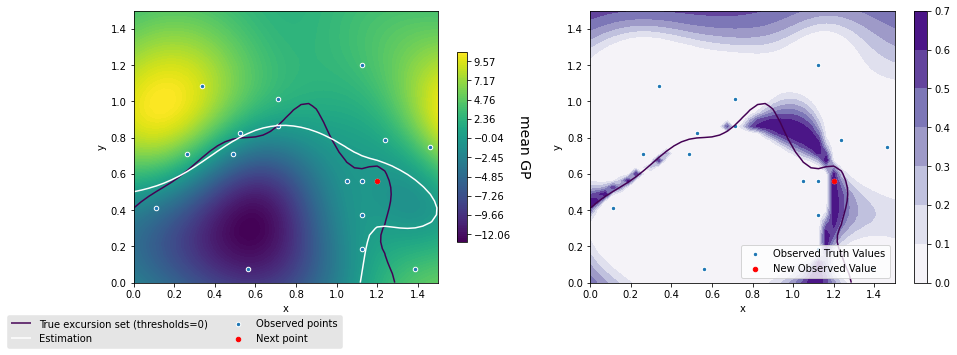

Accuracy % 0.9387269482450922


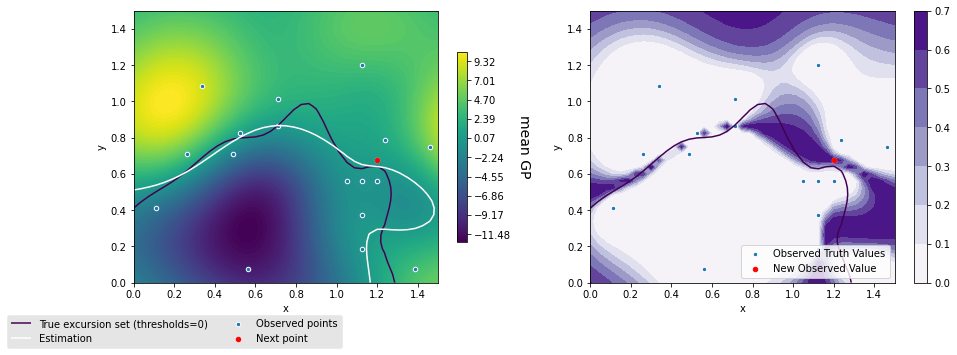

In [4]:
for iteration in range(15):
    x_one = learner_one.suggest()
    print(x_one)
    result_one = learner_one.evaluate_and_tell(x_one)
    plot(result_one, show_confusion_matrix=True)

learner_two.run(15,plot_result=True)

# for iteration in range(15):
#     x_two = learner_two.suggest()
#     print(x_two)
#     result_two = learner_two.evaluate_and_tell(x_two)
#     result_two.plot()

In [5]:
# added prelim support for likelihood
# can now have ONLY gpytorch.likelihoods.gaussian_likelihood objects.
#
# added support for epsilon (noise multiplier) being 0 or greater.  (no check for >0 tho, which it can't be)


Accuracy % 0.8746100607942426
tensor([[0.1125, 0.6000, 1.2375]], device='cuda:0', dtype=torch.float64) tensor([8.6599], device='cuda:0', dtype=torch.float64)
Accuracy % 0.8746100607942426


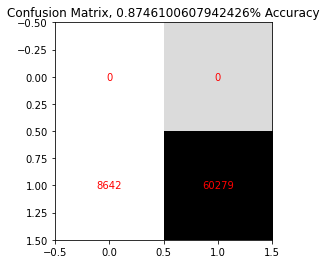

tensor([[0.6375, 0.3750, 1.2375]], device='cuda:0', dtype=torch.float64) tensor([6.1674], device='cuda:0', dtype=torch.float64)
Accuracy % 0.8746100607942426


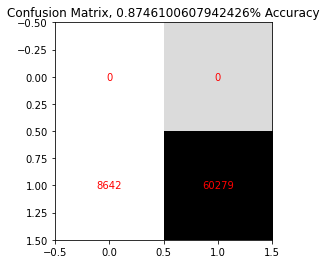

tensor([[0.6000, 0.6375, 1.0500]], device='cuda:0', dtype=torch.float64) tensor([6.1024], device='cuda:0', dtype=torch.float64)
Accuracy % 0.8746100607942426


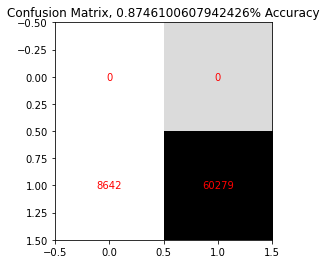

tensor([[0.6000, 0.7125, 1.4250]], device='cuda:0', dtype=torch.float64) tensor([8.0281], device='cuda:0', dtype=torch.float64)
Accuracy % 0.8746100607942426


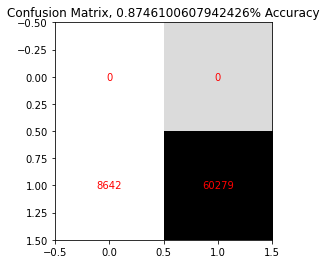

tensor([[0.4500, 0.3375, 0.9750]], device='cuda:0', dtype=torch.float64) tensor([1.9993], device='cuda:0', dtype=torch.float64)
Accuracy % 0.8746100607942426


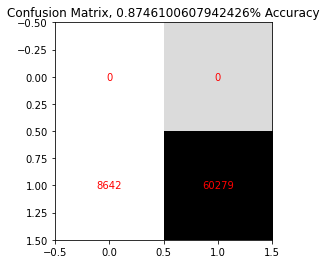

tensor([[0.3375, 0.1500, 0.9750]], device='cuda:0', dtype=torch.float64) tensor([-0.4228], device='cuda:0', dtype=torch.float64)
Accuracy % 0.8774829152217757


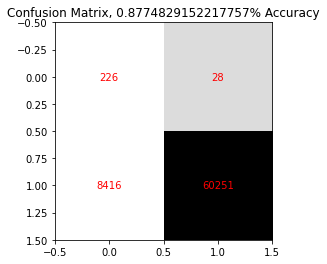

tensor([[0.1500, 0.0750, 0.9750]], device='cuda:0', dtype=torch.float64) tensor([-1.1890], device='cuda:0', dtype=torch.float64)
Accuracy % 0.8815600470103452


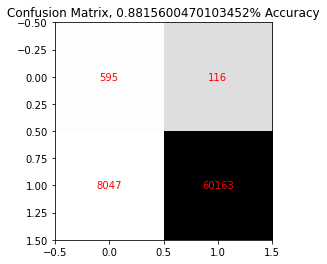

tensor([[0.0000, 0.1125, 0.9750]], device='cuda:0', dtype=torch.float64) tensor([-0.0989], device='cuda:0', dtype=torch.float64)
Accuracy % 0.8823145340317174


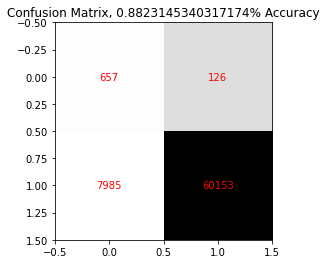

tensor([[0.4125, 0.1125, 0.7875]], device='cuda:0', dtype=torch.float64) tensor([-3.2696], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9311965873971648


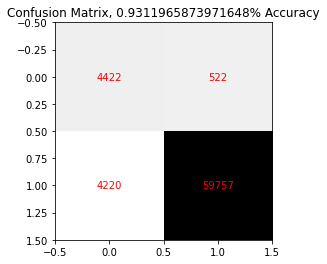

tensor([[0.0375, 0.0750, 0.1125]], device='cuda:0', dtype=torch.float64) tensor([-13.3313], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9521190928744505


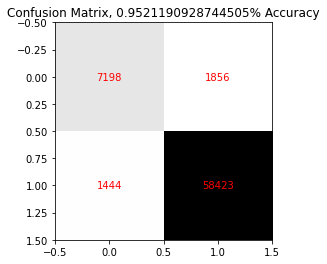

tensor([[0.2625, 0.7500, 0.1875]], device='cuda:0', dtype=torch.float64) tensor([6.1475], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9476502082093992


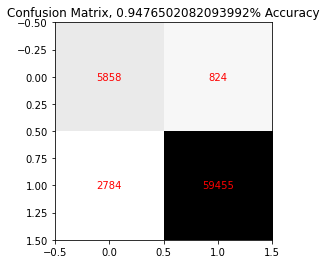

tensor([[0.2250, 0.5250, 0.3375]], device='cuda:0', dtype=torch.float64) tensor([1.6837], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9545566663281148


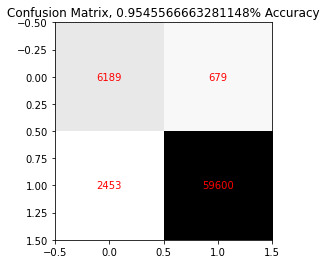

tensor([[0.7500, 0.4125, 0.0000]], device='cuda:0', dtype=torch.float64) tensor([-6.3226], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9279174707273545


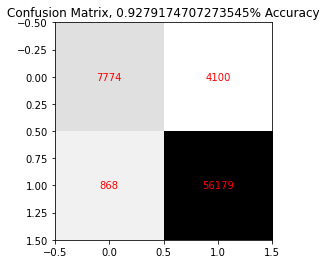

tensor([[1.5000, 0.7500, 0.1500]], device='cuda:0', dtype=torch.float64) tensor([6.4002], device='cuda:0', dtype=torch.float64)
Accuracy % 0.958111460948042


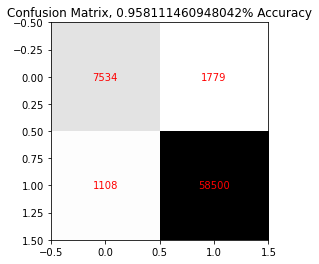

tensor([[1.0500, 0.1875, 0.4875]], device='cuda:0', dtype=torch.float64) tensor([3.7160], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9719969240144514


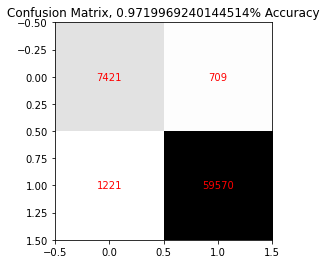

In [6]:
# #
# # If I do not have the function handle properly provided in the problem details I can use basic ask-and-tell.
# #
import excursion_new.test_suite.test_functions.fast_3D as testcase_3D
learner_three = Learner(testcase_3D, algorithm_opts)
learner_three.initialize()

for iteration in range(15):
    x_three = learner_three.suggest()
    new_y = learner_three.details.functions[0](x_three)
    print(x_three, new_y)
    result_three = learner_three.tell(x_three, new_y)
    plot(result_three, show_confusion_matrix=True)



In [7]:
file = open('../excursion_new/test_suite/algorithm_specs_circle.yaml', "r")
algorithm_opts = yaml.safe_load(file)
print('algorithm_opts =')
print(json.dumps(algorithm_opts, indent=4))

algorithm_opts =
{
    "example": "parabola_nD",
    "ninit": 7,
    "init_type": "random",
    "jump_start": false,
    "device": "cuda",
    "likelihood": {
        "likelihood_type": "GaussianLikelihood",
        "epsilon": 0.2
    },
    "model": {
        "type": "GridGP",
        "fit_optimizer": "LBFGS"
    },
    "acq": {
        "acq_type": "MES"
    }
}


tensor([[-0.3158, -0.7368, -0.5263,  0.1053]], device='cuda:0',
       dtype=torch.float64) tensor([0.9307], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9848


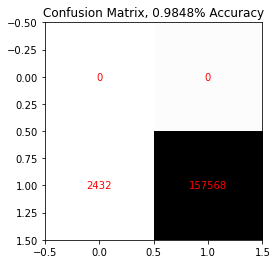

tensor([[ 0.1053,  0.7368, -0.5263, -1.5789]], device='cuda:0',
       dtype=torch.float64) tensor([3.3241], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9848


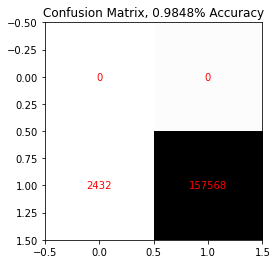

tensor([[-0.9474, -0.1053, -0.5263, -1.3684]], device='cuda:0',
       dtype=torch.float64) tensor([3.0582], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9848


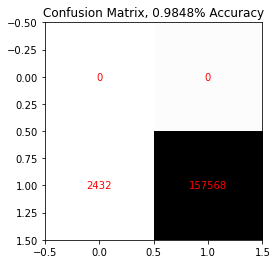

tensor([[-0.7368, -0.5263, -0.1053,  0.3158]], device='cuda:0',
       dtype=torch.float64) tensor([0.9307], device='cuda:0', dtype=torch.float64)
Accuracy % 0.98425625


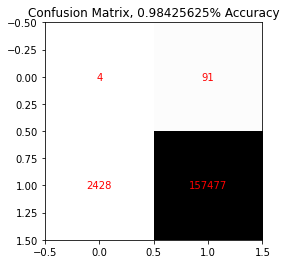

tensor([[ 0.3158,  1.7895,  1.7895, -2.0000]], device='cuda:0',
       dtype=torch.float64) tensor([10.5042], device='cuda:0', dtype=torch.float64)
Accuracy % 0.98489375


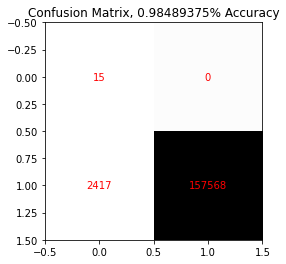

tensor([[-0.3158, -0.5263,  0.1053, -0.5263]], device='cuda:0',
       dtype=torch.float64) tensor([0.6648], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9858125


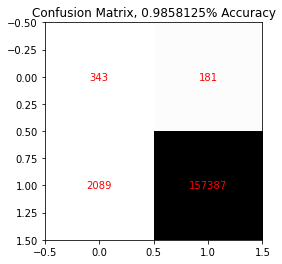

tensor([[-1.7895, -1.7895,  1.3684,  0.1053]], device='cuda:0',
       dtype=torch.float64) tensor([8.2881], device='cuda:0', dtype=torch.float64)
Accuracy % 0.986175


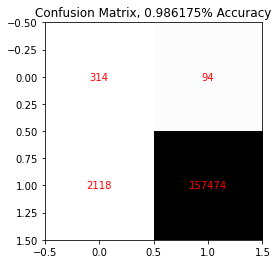

tensor([[ 0.1053, -0.5263, -0.1053, -0.7368]], device='cuda:0',
       dtype=torch.float64) tensor([0.8421], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9866375


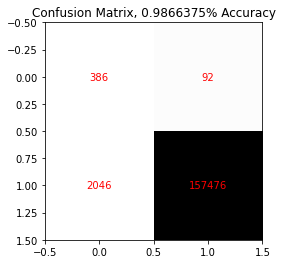

tensor([[-0.7368, -0.1053, -0.5263, -0.1053]], device='cuda:0',
       dtype=torch.float64) tensor([0.8421], device='cuda:0', dtype=torch.float64)
Accuracy % 0.98716875


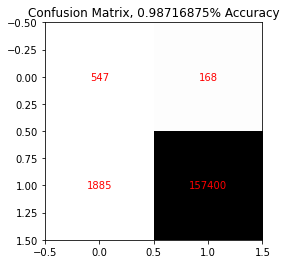

tensor([[-0.7368,  0.3158, -0.5263, -0.1053]], device='cuda:0',
       dtype=torch.float64) tensor([0.9307], device='cuda:0', dtype=torch.float64)
Accuracy % 0.98771875


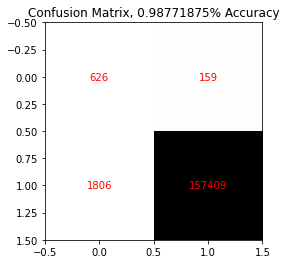

tensor([[ 0.3158, -0.3158,  0.1053, -0.1053]], device='cuda:0',
       dtype=torch.float64) tensor([0.2216], device='cuda:0', dtype=torch.float64)
Accuracy % 0.991725


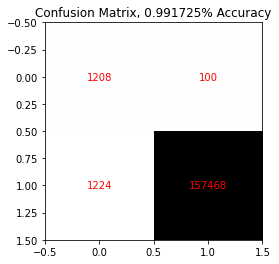

tensor([[ 0.5263,  0.1053, -0.5263, -0.1053]], device='cuda:0',
       dtype=torch.float64) tensor([0.5762], device='cuda:0', dtype=torch.float64)
Accuracy % 0.99255625


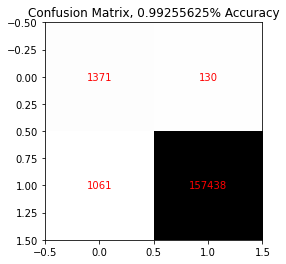

tensor([[-0.1053, -0.7368,  0.1053,  0.3158]], device='cuda:0',
       dtype=torch.float64) tensor([0.6648], device='cuda:0', dtype=torch.float64)
Accuracy % 0.9922875


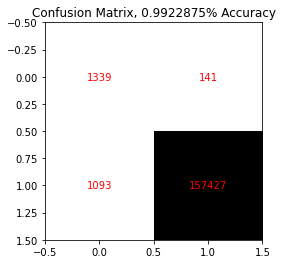

tensor([[-0.7368, -0.5263,  0.1053, -0.5263]], device='cuda:0',
       dtype=torch.float64) tensor([1.1080], device='cuda:0', dtype=torch.float64)
Accuracy % 0.99229375


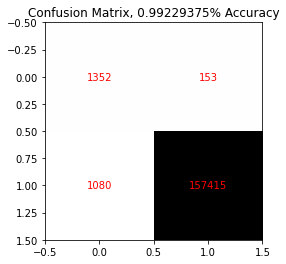

tensor([[ 0.7368,  0.3158, -0.3158, -0.1053]], device='cuda:0',
       dtype=torch.float64) tensor([0.7535], device='cuda:0', dtype=torch.float64)
Accuracy % 0.99210625


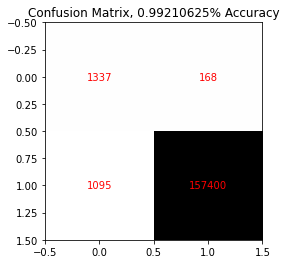

In [8]:
import excursion_new.test_suite.test_functions.parabola_nD as testcase_4D
learner_four = Learner(testcase_4D, algorithm_opts)
learner_four.initialize()

for iteration in range(15):
    x_three = learner_four.suggest()
    new_y = learner_four.details.functions[0](x_three)
    print(x_three, new_y)
    result_three = learner_four.tell(x_three, new_y)
    plot(result_three, show_confusion_matrix=True)